# 紫外-可见光谱仪 实验数据分析


## 分光光度计测量罗丹明-B溶液的浓度
利用

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal
import numpy as np
from scipy import constants
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
standard=pd.read_csv('罗丹明B-10mgL.csv',usecols=[0,1])
A=pd.read_csv('罗丹明B-A组.csv',usecols=[0,1])
B=pd.read_csv('罗丹明B-B组.csv',usecols=[0,1])
C=pd.read_csv('罗丹明B-C组.csv',usecols=[0,1])
D=pd.read_csv('罗丹明B-D组.csv',usecols=[0,1])
data_lis=[standard,A,B,C,D]
name_lis=['10mg/L','A组','B组','C组','D组']
color=['r','y','c','g','b']

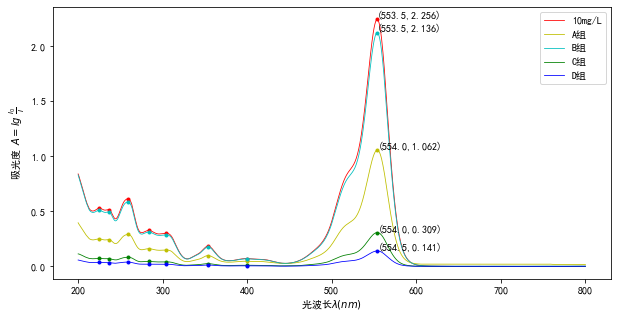

In [3]:
peaks_lis=[]
plt.figure(figsize=[10,5])
plt.xlabel(r'光波长$\lambda(nm)$')
plt.ylabel(r'吸光度 $A=lg\ {\frac{I_0}{I}}$')
xy=standard.values.T
x=xy[0]
y=signal.savgol_filter(xy[1],53,10)
peaks=signal.find_peaks(y,prominence=0.002)
for i in range(5):
    xy=data_lis[i].values.T
    x=xy[0]
    y=signal.savgol_filter(xy[1],53,10)
    peaks_x=[x[i] for i in peaks[0]]
    peaks_y=[y[i] for i in peaks[0]]
    max_point=max(xy.T,key=lambda a:a[1])
    plt.plot(peaks_x,peaks_y,'.',color=color[i])
    plt.plot(x,y,label=name_lis[i],linewidth=0.8,color=color[i])
    plt.text(*max_point,s='('+str(max_point[0])+','+str(max_point[1])+')')
plt.legend()
plt.show()

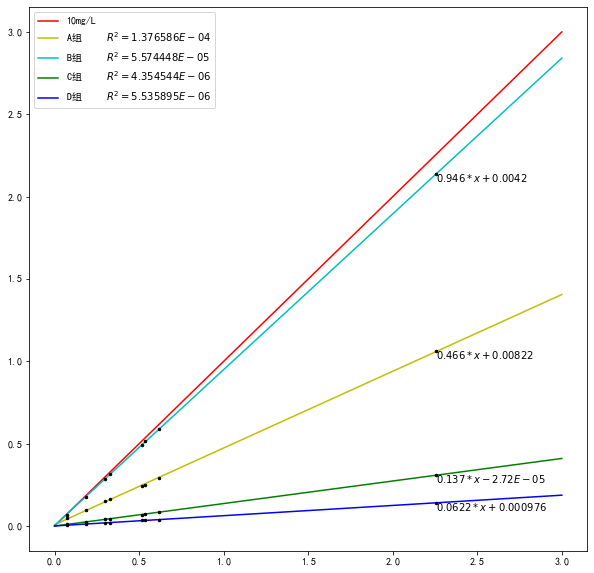

In [4]:
plt.figure(figsize=[10,10])
result=[]
plt.plot(np.linspace(0,3,100),np.linspace(0,3,100),label=name_lis[0],color=color[0])
for i in range(1,5):
    y_1=[data_lis[i].values.T[1][j] for j in peaks[0]]
    y_0=[data_lis[0].values.T[1][j] for j in peaks[0]]
    fit=np.polyfit(y_0,y_1,1)
    result.append(fit)
    res=np.poly1d(fit)
    r2=sum((res(y_0)-y_1)**2)
    plt.plot(np.linspace(0,3,100),res(np.linspace(0,3,100)),label=name_lis[i]+' '*5+'$R^2='+'%E'%r2+'$',color=color[i])
    plt.text(max(y_0),max(y_1)-0.05,'$'+'%.3G'%fit[0]+('*x+' if fit[1]>0 else '*x')+'%.3G'%fit[1]+'$')
    plt.plot(y_0,y_1,'.',color='black',markersize=5)
plt.legend()
plt.show()

根据拟合结果可得 

|组别|浓度C(mg/L)|拟合不确信度$R^2$|
|:-|:-|:-|
|A组|4.46|1.376586E-04|
|B组|9.46|5.574448E-05|
|C组|1.37|4.354544E-06|
|D组|0.662|5.535895E-06|

## 分光光度计测量半导体禁带宽度

In [5]:
TiO2=pd.read_csv('TiO2.csv',usecols=[0,1])
WO3=pd.read_csv('WO3.csv',usecols=[0,1])
BiVO4=pd.read_csv('BiVO4.csv',usecols=[0,1])
data_lis_2=[TiO2,WO3,BiVO4]
name_lis_2=['TiO2','WO3','BiVO4']

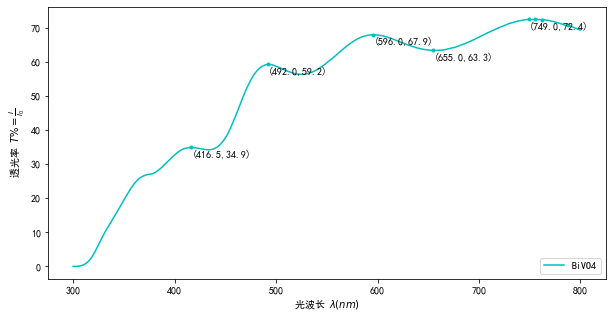

In [26]:
plt.figure(figsize=[10,5])
plt.xlabel(r'光波长 $\lambda(nm)$')
plt.ylabel(r'透光率 $T\%=\frac{I}{I_0}$')
result={}
for i in range(2,3):
    xy=data_lis_2[i].values.T
    x=xy[0]
    y=signal.savgol_filter(xy[1],53,10)
    peaks=signal.find_peaks(y,prominence=0.005)
    peaks_x=[x[i] for i in peaks[0]]
    peaks_y=[y[i] for i in peaks[0]]
    result[name_lis_2[i]]=peaks_x
    plt.plot(peaks_x,peaks_y,'.',color=color[i])
    plt.plot(x,y,color=color[i],label=name_lis_2[i])
    for i in range(3,len(peaks_x)):
        plt.text(peaks_x[i],peaks_y[i]-3,s='('+str('%.1f'%peaks_x[i])+','+str('%.1f'%peaks_y[i])+')')
    #plt.text(peaks_x,peaks_y-3,s='('+str('%.1f'%peaks_x)+','+str('%.1f'%peaks_y)+')')
plt.legend(loc=4)
plt.show()

In [25]:
lambda1=492
lambda2=596
lambda3=749
d1=lambda1*lambda2/(2*np.pi*(lambda2-lambda1))
d2=lambda2*lambda3/(2*np.pi*(lambda3-lambda2))
d_avg=np.average([d1,d2])
d_avg

456.55279795720173

$$d=\frac{\lambda_1\lambda_2}{2\pi(\lambda_1-\lambda_2)}$$
$$\alpha_i=\frac{-\ln{T_i}}{d}$$

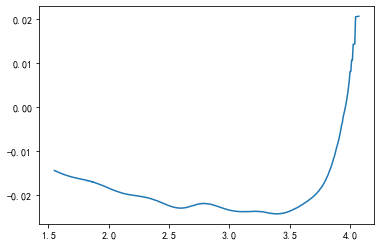

In [21]:
real=BiVO4.values.T
a_i=-np.log(real[1])/d_avg
y=a_i*constants.h*constants.c/real[0]/1e-9/constants.eV
x=constants.h*constants.c/real[0]/1e-9/constants.eV
plt.plot(x,y)

根据公式
$$h\nu_0=E_g$$
$$\frac{hc}{\lambda}=E_g$$
可得

|半导体物质|光波长$\lambda(nm)$|$E_g(eV)$|
|:----|:----|:---|
|$TiO_2$|410.5|3.020|
|$WO_3$|463.5|2.675|
|$BiVO_4$|492.0|2.520|

$$\alpha=\frac{4\pi k}{\lambda}$$
$$R=\frac{(n-1)^2+k^2}{(n+1)^2+k^2}$$
$$T=\frac{(1-R)^2e^{-\alpha d}}{1-R^2e^{-2\alpha d}}$$